-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000808954 s
Working in 2D dimensions.
Computational cell is 6.2 x 22 x 0 with resolution 50
     block, center = (-1.6,0,0)
          size (3,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4,4,4)
time for set_epsilon = 0.180162 s
-----------
     block, center = (-1.6,0,0)
          size (3,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4,4,4)


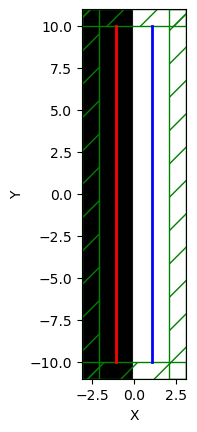

Meep progress: 47.99/107.55555534362793 = 44.6% done in 4.0s, 5.0s to go
on time step 4799 (time=47.99), 0.000833581 s/step
Meep progress: 96.94/107.55555534362793 = 90.1% done in 8.0s, 0.9s to go
on time step 9695 (time=96.95), 0.000817084 s/step
run 0 finished at t = 107.56 (10756 timesteps)
     block, center = (-1.6,0,0)
          size (3,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4,4,4)
     block, center = (0,-9.75,0)
          size (0.2,0.45,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-9.25,0)
          size (0.2,0.45,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-8.75,0)
          size (0.2,0.45,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-8.25,0)
          size (0.2,0.

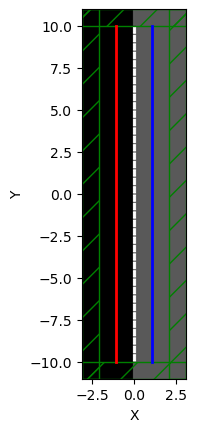

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000735998 s
Working in 2D dimensions.
Computational cell is 6.2 x 22 x 0 with resolution 50
     block, center = (-1.6,0,0)
          size (3,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4,4,4)
     block, center = (0,-9.75,0)
          size (0.2,0.45,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-9.25,0)
          size (0.2,0.45,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-8.75,0)
          size (0.2,0.45,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-8.25,0)
          size (0.2,0.45,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsil

In [6]:
import meep as mp
from meep.materials import Au
from matplotlib import pyplot as plt
import numpy as np

resolution = 50         # pixels/μm                                                                                                                   

dpml = 1.0              # PML thickness                                                                                                               
dsub = 2.0              # substrate thickness                                                                                                         
dpad = 2.0              # padding between grating and PML                                                                                             
gp = 0.5                # grating periodicity                                                                                                         
gh = 0.2                # grating height                                                                                                              
gdc = 1               # grating duty cycle
w = 0.05

num_cells = 40
gdc_list = [gdc for _ in range(num_cells)]

wmin = 0.4
wmax = 0.85
df = 1/wmin - 1/wmax
fcen = 0.5 * (1/wmin + 1/wmax)
nfreq = 50

k_point = mp.Vector3()

glass = mp.Medium(index=2)

pml_layers = [mp.PML(thickness=dpml)]

symmetries=[mp.Mirror(mp.Y)]

sx = dpml+dsub+gh+dpad+dpml
sy = dpml+num_cells*gp+dpml
cell_size = mp.Vector3(sx,sy)

src_pt = mp.Vector3(-0.5*sx+dpml+0.5*dsub)
sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df),
                     component=mp.Ey,
                     center=src_pt,
                     size=mp.Vector3(y=sy-2*dpml))]

geometry = [mp.Block(material=glass,
                     size=mp.Vector3(dpml+dsub,mp.inf,mp.inf),
                     center=mp.Vector3(-0.5*sx+0.5*(dpml+dsub)))]

sim = mp.Simulation(resolution=resolution,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    k_point=k_point,
                    sources=sources,
                    symmetries=symmetries)

mon_pt = mp.Vector3(0.5*sx-dpml-0.5*dpad)
transmission0_region = mp.FluxRegion(center=mon_pt, size=mp.Vector3(y=sy-2*dpml))
transmission0_flux_monitor = sim.add_flux(fcen,df,nfreq,transmission0_region)
transmitted_flux0 = mp.get_fluxes(transmission0_flux_monitor)


%matplotlib inline
plt.figure(dpi=100)
sim.plot2D()
plt.show()

sim.run(until_after_sources=100)

transmitted_flux0 = mp.get_fluxes(transmission0_flux_monitor)


sim.reset_meep()

for j in range(num_cells):
  geometry.append(mp.Block(material=Au,
                           size=mp.Vector3(gh,gdc_list[j]*gp-w,mp.inf),
                           center=mp.Vector3(0,-0.5*sy+dpml+(j+0.5)*gp)))

sim = mp.Simulation(resolution=resolution,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    k_point=k_point,
                    sources=sources,
                    symmetries=symmetries)

transmission_region = mp.FluxRegion(center=mon_pt, size=mp.Vector3(y=sy-2*dpml))
transmission_flux_monitor = sim.add_flux(fcen,df,nfreq,transmission_region)

plt.figure(dpi=100)
sim.plot2D()
plt.show()

sim.run(until_after_sources=100)

transmitted_flux = mp.get_fluxes(transmission_flux_monitor)

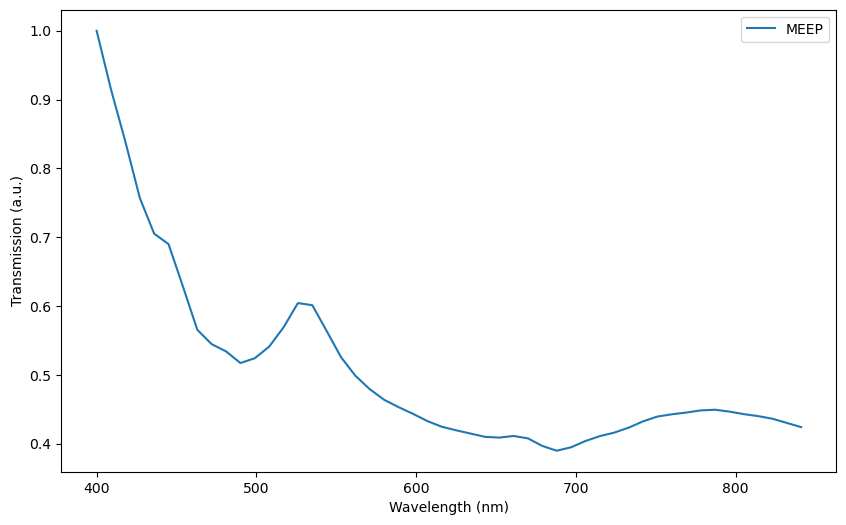

In [7]:
# Calculando a transmitância T
T = abs(np.divide(transmitted_flux, transmitted_flux0))

# Normalizando T
T = np.array(T)
T = T / T.max()  # Normaliza os valores de T para o intervalo [0, 1]

# Número de pontos
ny = len(T)

# Calculando o eixo x (frequências)
x = [(wmin + i * ((wmax - wmin) / ny)) * 1000 for i in range(ny)]

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, T, label='MEEP')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission (a.u.)')
plt.title('')
plt.legend()
#plt.grid(True)

# Especificando os limites dos eixos x e y
#plt.xlim(450, 800)
#plt.ylim(0,1.1)

# Salvando a figura como uma imagem
plt.savefig('transmitancia_vs_wavelength.png')

# Exibindo o gráfico
plt.show()
